# 加载数据 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm
import json
import george

In [2]:
from matplotlib import font_manager

In [ ]:
font_manager.fontManager.addfont("/home/yltang/data/Times_New_Roman.ttf")

In [4]:
plt.style.use('classic')
font1 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size':20,
         }

In [5]:
sample=0
color = ['r','g','b','k','y','m']
fmt = ['or','og','ob','ok','oy','om']
bands = ['u','g','r','i','z','y']

In [6]:
trasient_name = ["AGN", "KN", "SLSN", "SNIa", "SNIa-91bg", 
                 "SNIax", "SNIbc", "SNII", "TDE"
                ]
demonstrate_lc = []

In [97]:
# 读取 JSON 文件
with open(f'/home/yltang/data/simulated_data_1/data_new/TDE/data/TDE_2_1.json', 'r') as file:
    data_list = json.load(file)
with open(f'/home/yltang/data/simulated_data_1/data_new/TDE/redshift/TDE_redshift_2_1.json', 'r') as file:
    redshift = json.load(file)

In [98]:
len(data_list)

1819

In [99]:
id_ = 0

In [127]:
id_ += 1
mjd = []
flux = []
flux_err = []
for i in range(3):
    mjd_ = data_list[id_][0][i]
    flux_ = data_list[id_][1][i]
    flux_err_ = data_list[id_][2][i]
    
    mjd_ = np.array(mjd_)
    flux_ = np.array(flux_)
    flux_err_ = np.array(flux_err_)
    
    mjd.append(mjd_)
    flux.append(flux_)
    flux_err.append(flux_err_)  


In [128]:
lc = [mjd, flux, flux_err]

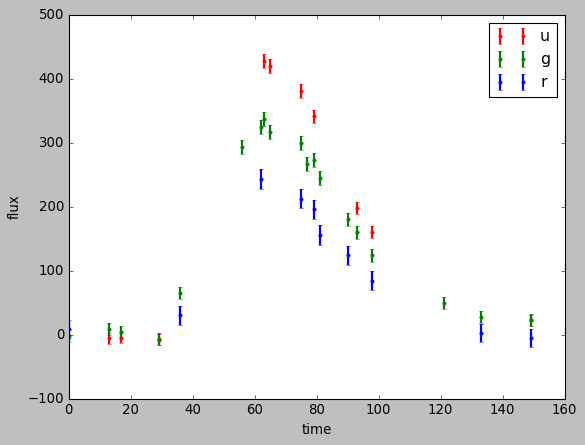

In [129]:
markers = ["d", "o", "v", "^", "<", ">", "1", "X", "p", "P", "*", "+"]
#color = ['r','g','b','k','y','m']
#fmt = ['dr','og','vb','^k','<y','>m']
#用不同的颜色代表不同波段, 不同形状代表不同数据
fmt_1 = ['.r','.g','.b','.k','.y','.m']
fmt_2 = ['dr','dg','db','dk','dy','dm']
label = ['u','g','r','i','z','w']
for i in range(3):
    mjd_ = lc[0][i]
    flux_ = lc[1][i]
    flux_err_ = lc[2][i]
    
    plt.errorbar(x=mjd_, y=flux_, yerr=flux_err_, fmt=fmt_1[i], elinewidth=2, capsize=2,label=label[i])
    plt.legend()
    #plt.xlim(min(mjd),max(mjd))
    plt.xlabel("time")
    plt.ylabel("flux")

In [130]:
demonstrate_lc.append(lc)

In [131]:
len(demonstrate_lc)

9

In [132]:
len(demonstrate_lc[0][0][0])

10

In [133]:
#lc = [mjd, flux, flux_err]
#trasient_name = ["AGN", "KN", "SLSN", "SNIa", "SNIa-91bg", "SNIax", "SNIbc", "SNII", "TDE"

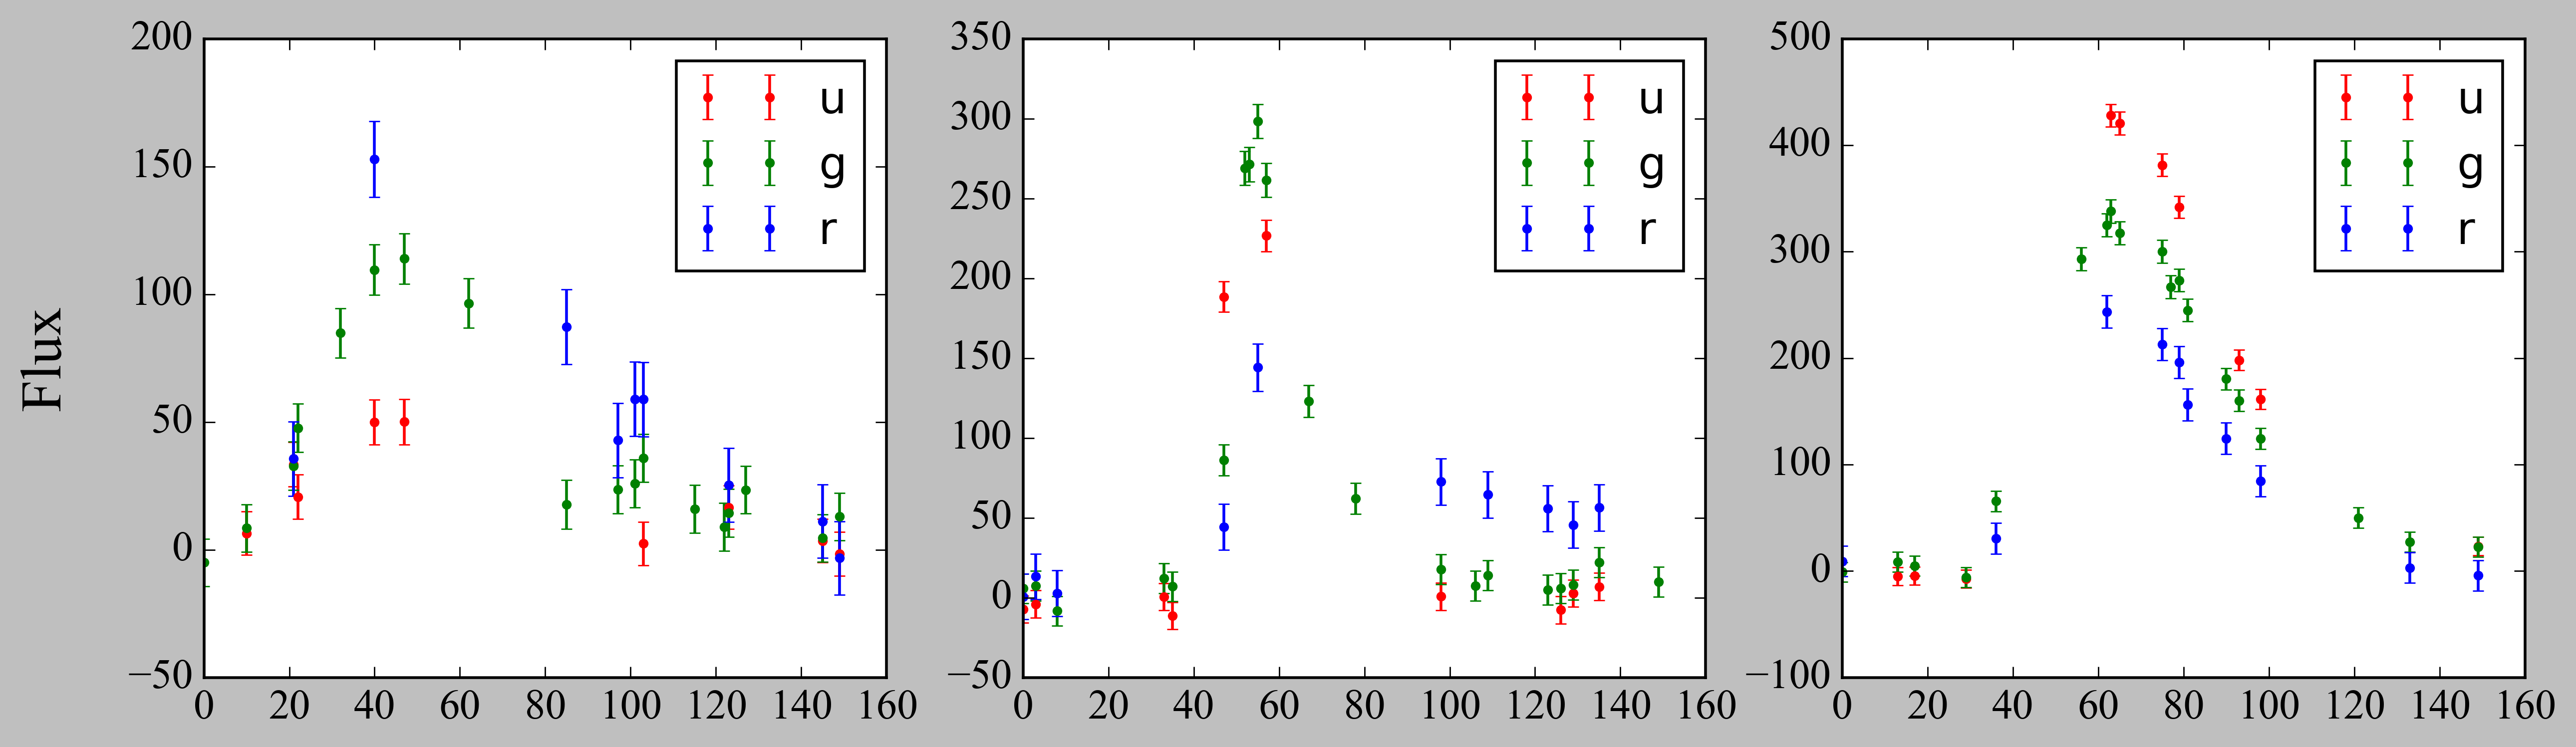

10


In [150]:
# 1. 相关模块导入
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示中文字体
#plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 3. 绘图
  # 3.1 共享X轴
figure,(ax1,ax2, ax3) = plt.subplots(1,3,
                                    figsize=(5*3,4),
                                    dpi=400,
                                    # 共享x轴
                                    #sharey=True
                                    )
                

# 2. 创建制图数据
ax_list = [ax1,ax2, ax3]
for i in range(3):
    
    mjd_1 = demonstrate_lc[6][0][i]
    flux_1 = demonstrate_lc[6][1][i]
    flux_err_1 = demonstrate_lc[6][2][i]

        
    mjd_2 = demonstrate_lc[7][0][i]
    flux_2 = demonstrate_lc[7][1][i]
    flux_err_2 = demonstrate_lc[7][2][i]
        
    mjd_3 = demonstrate_lc[8][0][i]
    flux_3 = demonstrate_lc[8][1][i]
    flux_err_3 = demonstrate_lc[8][2][i]

    mjd_list = [mjd_1, mjd_2, mjd_3]
    flux_list = [flux_1,flux_2, flux_3]
    flux_err_list = [flux_err_1, flux_err_2, flux_err_3]
    
    for j in range(3):
        ax_list[j].errorbar(x=mjd_list[j], y=flux_list[j], yerr=flux_err_list[j],fmt=fmt_1[i], capsize=2,label=bands[i])
        #ax_list[j].errorbar(x=mjd_1, y=flux_list[j], yerr=flux_err_list[j],color=color[i], marker=markers[i], capsize=2,label=label[i])

        ax_list[j].legend(fontsize="xx-large",loc="upper right",prop=font1)
        #设置坐标轴字体
        x1_label = ax_list[j].get_xticklabels() 
        [x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
        y1_label = ax_list[j].get_yticklabels() 
        [y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
        if i==0:
            ax_list[i].set_ylabel("Flux",fontsize="xx-large", labelpad=20,fontproperties="Times New Roman")

        #ax_list[j].set_ylim(-0.3,1.2)
        #ax_list[j].set_xlim(-7,85)
        
        # 2.4 坐标轴刻度字体颜色设置
        ax_list[j].tick_params(axis='y',
                     labelsize=15, # y轴字体大小设置
                     #color='r',    # y轴标签颜色设置  
                     #labelcolor='b', # y轴字体颜色设置
                     direction='in' # y轴标签方向设置
                      ) 
    
        ax_list[j].tick_params(axis='x',
                     labelsize=15, # y轴字体大小设置
                     #color='r',    # y轴标签颜色设置  
                     #labelcolor='b', # y轴字体颜色设置
                     direction='in' # y轴标签方向设置
                      )
        ax_list[j].legend(fontsize=16,
                      #bbox_to_anchor=(0,0.34,1.028, 1),
                      loc="upper right",
                      framealpha=1,
                     )

# 调整子图形之间的纵向距离
figure.subplots_adjust(wspace=0.2) 

plt.savefig("lc_demo_2.jpg",bbox_inches='tight')

plt.show()

print(id_)